In [1]:
import numpy as np

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
df=pd.read_csv("loan_data.csv")


In [8]:
df.head()



,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [11]:
df['purpose'].value_counts()

debt_consolidation    3957
all_other             2331
credit_card           1262
home_improvement       629
small_business         619
major_purchase         437
educational            343
Name: purpose, dtype: int64

In [109]:
df['not.fully.paid'].value_counts()

0    8045
1    1533
Name: not.fully.paid, dtype: int64

In [119]:
df['fico'] #this is our target label we have to decide whether the investor will get its money back or not

0       737
1       707
2       682
3       712
4       667
       ... 
9573    672
9574    722
9575    687
9576    692
9577    732
Name: fico, Length: 9578, dtype: int64

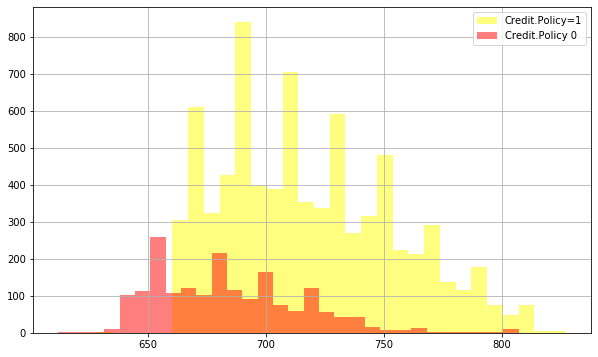

In [120]:
plt.figure(figsize=(10,6))
df[df['credit.policy']==1]['fico'].hist(alpha=0.5,color='yellow',
                                              bins=30,label='Credit.Policy=1')  # all the fico with credit polixy as 1

df[df['credit.policy']==0]['fico'].hist(color='red',alpha=0.5,bins=30,label='Credit.Policy 0')

plt.legend()

# this plot shows all the fico score according the credit policy


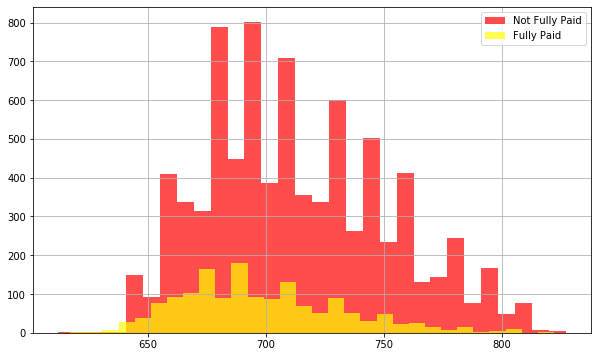

In [96]:
plt.figure(figsize=(10,6))
df[df['not.fully.paid']==0]['fico'].hist(color='red',label='Not Fully Paid',bins=30,alpha=0.7)
df[df['not.fully.paid']==1]['fico'].hist(color='yellow',label='Fully Paid',bins=30,alpha=0.7)
plt.legend()



# this plot shows the defaulters according to their fico score

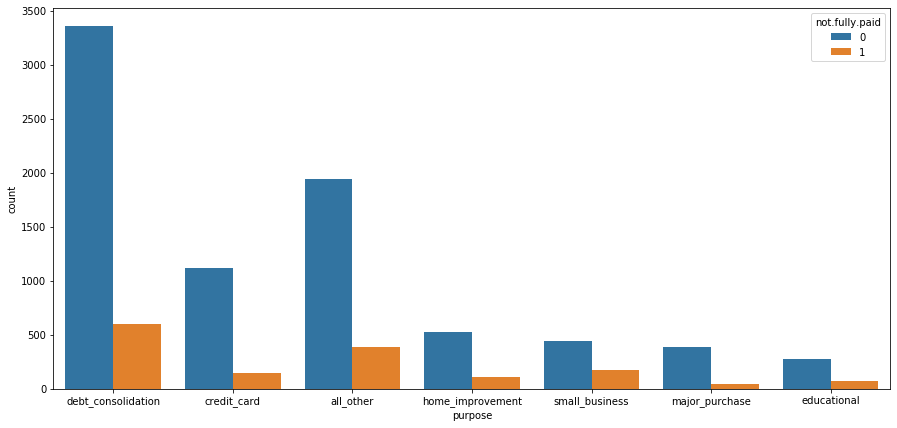

In [108]:
plt.figure(figsize=(15,7))
sns.countplot(x=df['purpose'],hue=df['not.fully.paid'])    # there are majorly 6 causes

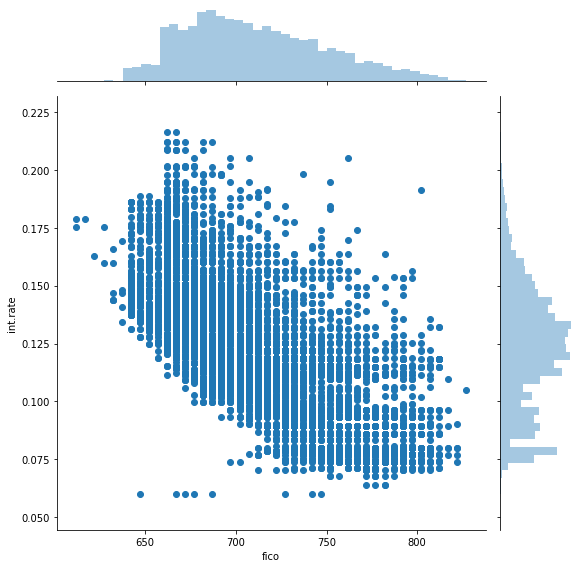

In [117]:

sns.jointplot(x=df['fico'],y=df['int.rate'],height=8,)# we can see that low fico score has high interests

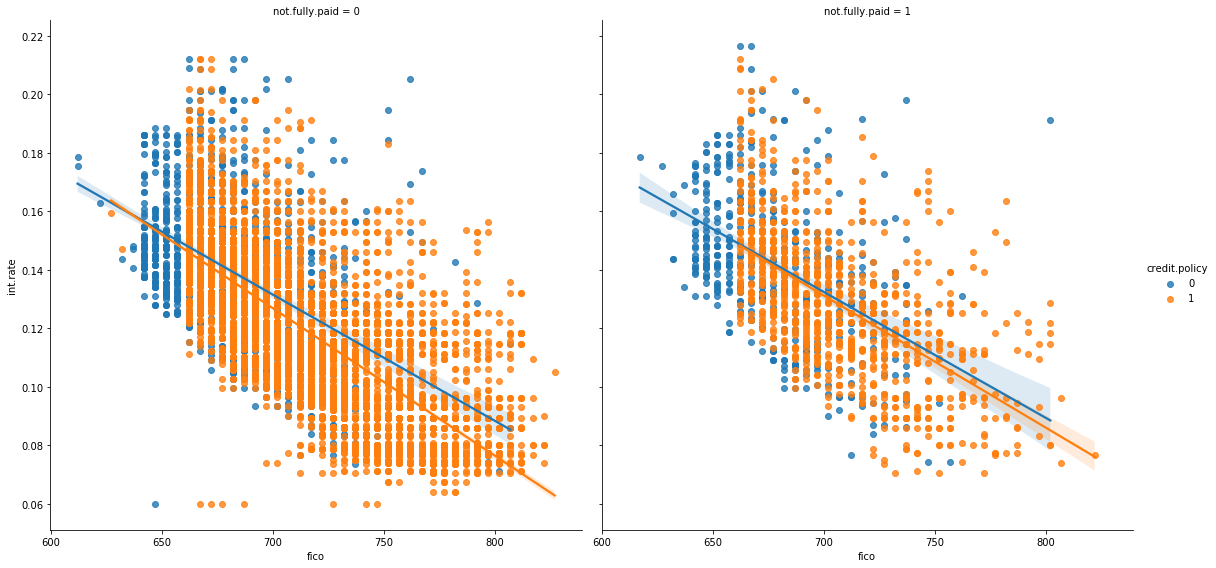

In [133]:
sns.lmplot(x='fico',y='int.rate',data=df,height=8,hue='credit.policy',col='not.fully.paid')
# two seperate division there no trends according to the not fully paid coloumn 

In [134]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [135]:
#df['purpose'] is categorical but we must convert it into numerical data to feed in to the algos

0       debt_consolidation
1              credit_card
2       debt_consolidation
3       debt_consolidation
4              credit_card
               ...        
9573             all_other
9574             all_other
9575    debt_consolidation
9576      home_improvement
9577    debt_consolidation
Name: purpose, Length: 9578, dtype: object

In [137]:
cat_data=['purpose']

In [138]:
data=pd.get_dummies(df,cat_data)    # will create a seperate coloumn for each type

In [145]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   credit.policy               9578 non-null   int64  
 1   int.rate                    9578 non-null   float64
 2   installment                 9578 non-null   float64
 3   log.annual.inc              9578 non-null   float64
 4   dti                         9578 non-null   float64
 5   fico                        9578 non-null   int64  
 6   days.with.cr.line           9578 non-null   float64
 7   revol.bal                   9578 non-null   int64  
 8   revol.util                  9578 non-null   float64
 9   inq.last.6mths              9578 non-null   int64  
 10  delinq.2yrs                 9578 non-null   int64  
 11  pub.rec                     9578 non-null   int64  
 12  not.fully.paid              9578 non-null   int64  
 13  purpose_all_other           9578 

In [146]:
from sklearn.model_selection import train_test_split

In [151]:
X=data.drop('not.fully.paid',axis=1)
Y=data['not.fully.paid']
X_train, X_test, y_train, y_test=train_test_split(X,Y,test_size=0.33)

In [153]:
from sklearn.tree import DecisionTreeClassifier

In [154]:
desc=DecisionTreeClassifier()

In [155]:
desc.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [161]:
pred=desc.predict(X_test)

In [162]:
from sklearn.metrics import classification_report,confusion_matrix

In [164]:
print(classification_report(pred,y_test))

              precision    recall  f1-score   support

           0       0.83      0.86      0.85      2577
           1       0.28      0.24      0.26       584

    accuracy                           0.75      3161
   macro avg       0.56      0.55      0.55      3161
weighted avg       0.73      0.75      0.74      3161



In [165]:
print(confusion_matrix(pred,y_test))

[[2223  354]
 [ 445  139]]


In [166]:
from sklearn.ensemble import RandomForestClassifier

In [167]:
rd=RandomForestClassifier()

In [168]:
rd.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [169]:
pred_random=rd.predict(X_test)

In [170]:
print(classification_report(pred_random,y_test))

              precision    recall  f1-score   support

           0       0.99      0.85      0.92      3130
           1       0.03      0.52      0.06        31

    accuracy                           0.84      3161
   macro avg       0.51      0.68      0.49      3161
weighted avg       0.98      0.84      0.91      3161



In [171]:
print(confusion_matrix(pred_random,y_test))

[[2653  477]
 [  15   16]]
